In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
crime_data = pd.read_excel('./crime/data_final/data_total_2019.xlsx')
crime_data.head()

,기간,자치구,인구 수(명),면적(㎢),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
0,2019,강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01
1,2019,강동구,440390,24.59,4014,17,6,1051,364,124,390,7477,331,20.3,6.40
2,2019,강북구,317695,23.60,3838,15,5,681,266,82,451,4339,272,18.8,7.11
3,2019,강서구,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72
4,2019,관악구,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14


In [88]:
crime_data.drop(columns='기간', inplace=True)

In [89]:
crime_data['범죄율(10만명 당)'] = crime_data['범죄발생건수'] / crime_data['인구 수(명)'] * 100000
crime_data.head()

,자치구,인구 수(명),면적(㎢),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,범죄율(10만명 당)
0,강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01,1327.495552
1,강동구,440390,24.59,4014,17,6,1051,364,124,390,7477,331,20.3,6.40,911.464838
2,강북구,317695,23.60,3838,15,5,681,266,82,451,4339,272,18.8,7.11,1208.076929
3,강서구,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72,823.035638
4,관악구,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14,1029.895580


In [90]:
crime_data['경찰관서 수'] = crime_data['경찰관서 수'] / crime_data['면적(㎢)']
crime_data['소방관서 수'] = crime_data['소방관서 수'] / crime_data['면적(㎢)']
crime_data['카페 수'] = crime_data['카페 수'] / crime_data['면적(㎢)']
crime_data['편의점 수'] = crime_data['편의점 수'] / crime_data['면적(㎢)']
crime_data['공원 수'] = crime_data['공원 수'] / crime_data['면적(㎢)']
crime_data['버스정류장 수'] = crime_data['버스정류장 수'] / crime_data['면적(㎢)']
crime_data['가로등 수'] = crime_data['가로등 수'] / crime_data['면적(㎢)']
crime_data['ATM 수'] = crime_data['ATM 수'] / crime_data['면적(㎢)']

In [91]:
crime_data.drop(columns=['면적(㎢)'], inplace=True)

In [92]:
crime_data.set_index('자치구', inplace=True)
crime_data.head()

,인구 수(명),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,범죄율(10만명 당)
자치구,,,,,,,,,,,,,
강남구,550209,7304,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,23.5,7.01,1327.495552
강동구,440390,4014,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,20.3,6.40,911.464838
강북구,317695,3838,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,18.8,7.11,1208.076929
강서구,598273,4924,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,19.8,6.72,823.035638
관악구,517334,5328,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,17.1,7.14,1029.895580


In [93]:
crime_data.sort_values(by='범죄율(10만명 당)', ascending=False).head()

,인구 수(명),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,범죄율(10만명 당)
자치구,,,,,,,,,,,,,
중구,136488,4327,2.008032,0.702811,150.502008,34.738956,7.329317,21.184739,869.979920,41.465863,17.4,6.48,3170.242073
종로구,161869,3846,1.087411,0.292765,83.270598,12.463404,4.433292,15.558344,387.494772,13.383522,19.9,7.18,2375.995404
영등포구,400986,5820,0.651731,0.244399,60.651731,19.063136,4.399185,20.651731,377.922607,18.737271,24.9,6.68,1451.422244
용산구,245185,3313,0.594422,0.274348,54.229538,11.614083,5.029721,15.683585,349.199817,12.299954,19.1,6.28,1351.224586
강남구,550209,7304,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,23.5,7.01,1327.495552


In [95]:
print(np.corrcoef(crime_data['경찰관서 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['소방관서 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['카페 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['편의점 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['공원 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['버스정류장 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['가로등 수'], crime_data['범죄율(10만명 당)']))
print(np.corrcoef(crime_data['ATM 수'], crime_data['범죄율(10만명 당)']))

[[1.         0.57515172]
 [0.57515172 1.        ]]
[[1.         0.63044738]
 [0.63044738 1.        ]]
[[1.         0.73251675]
 [0.73251675 1.        ]]
[[1.         0.54043904]
 [0.54043904 1.        ]]
[[1.         0.20538696]
 [0.20538696 1.        ]]
[[ 1.         -0.08079308]
 [-0.08079308  1.        ]]
[[1.         0.67530456]
 [0.67530456 1.        ]]
[[1.         0.63003695]
 [0.63003695 1.        ]]


In [96]:
import matplotlib.pyplot as plt

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Linux':
    plt.rc('font', family = 'NanumBarunGothic')
else:
    print('Unknown system')

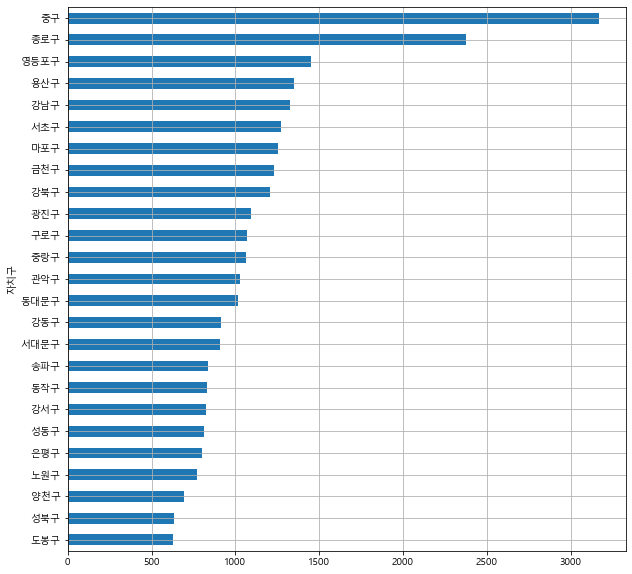

In [97]:
plt.figure(figsize = (10,10))
crime_data['범죄율(10만명 당)'].sort_values().plot(kind = 'barh', grid = True)
plt.show()

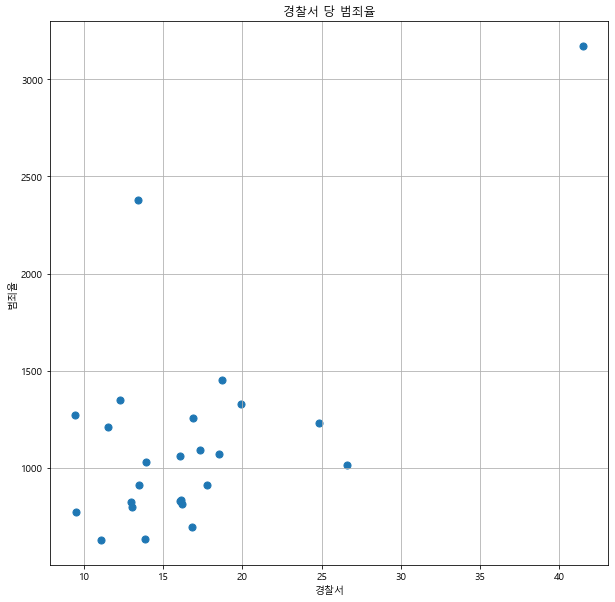

In [137]:
plt.figure(figsize=(10,10))
plt.scatter(crime_data['ATM 수'], crime_data['범죄율(10만명 당)'], s= 50)
plt.title('경찰서 당 범죄율')
plt.xlabel('경찰서')
plt.ylabel('범죄율')
plt.grid()
plt.show()

In [116]:
fp2 = np.polyfit(crime_data['경찰관서 수'], crime_data['범죄율(10만명 당)'], 1)
fp2

array([896.35264009, 404.75857515])

In [117]:
fp2 = np.polyfit(crime_data['경찰관서 수'], crime_data['범죄율(10만명 당)'], 1)

f2 = np.poly1d(fp2)
fx2 = np.linspace(0.25, 2, 10)


crime_data['경찰서 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f2(crime_data['경찰관서 수']))

df_sort = crime_data.sort_values(by = '경찰서 오차', ascending=False)

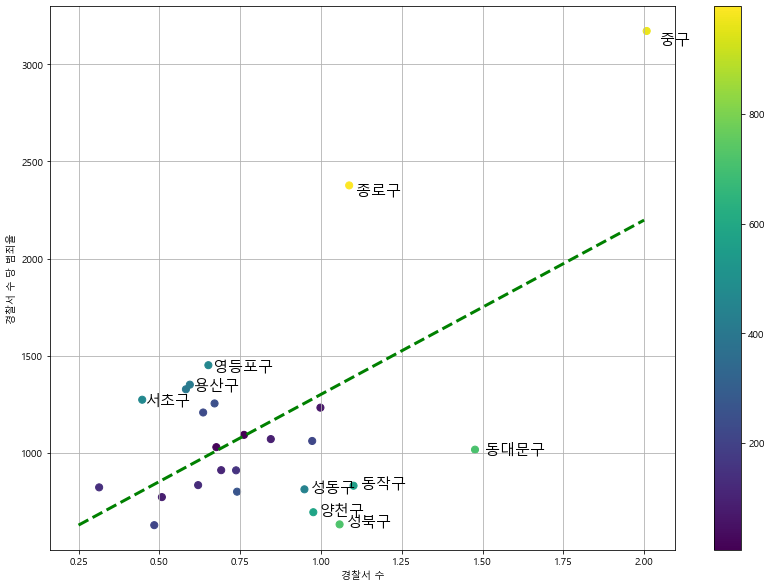

In [118]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['경찰관서 수'], crime_data['범죄율(10만명 당)'], c=crime_data['경찰서 오차'], s= 50)
plt.plot(fx2, f2(fx2), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['경찰관서 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('경찰서 수')
plt.ylabel('경찰서 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [120]:
fp3 = np.polyfit(crime_data['카페 수'], crime_data['범죄율(10만명 당)'], 1)

f3 = np.poly1d(fp3)
fx3 = np.linspace(20, 150, 10)

crime_data['카페 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f3(crime_data['카페 수']))

df_sort = crime_data.sort_values(by = '카페 오차', ascending=False)

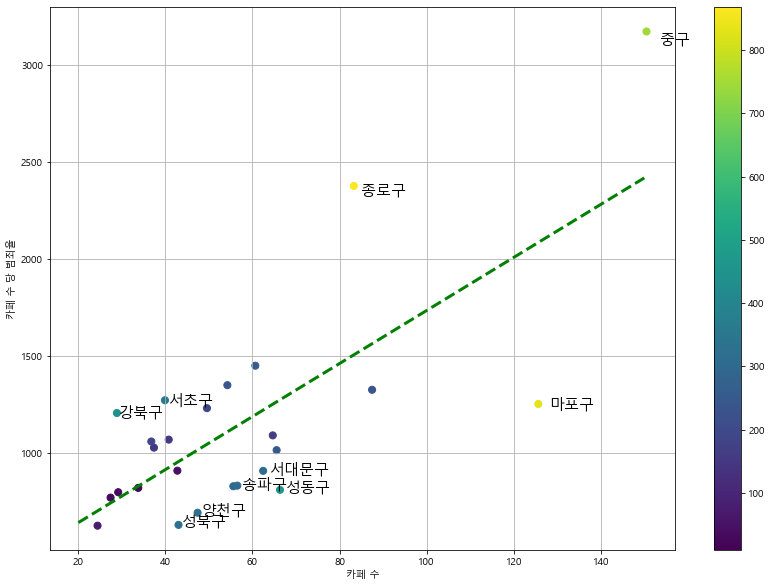

In [121]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['카페 수'], crime_data['범죄율(10만명 당)'], c=crime_data['카페 오차'], s= 50)
plt.plot(fx3, f3(fx3), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['카페 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('카페 수')
plt.ylabel('카페 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [124]:
fp4 = np.polyfit(crime_data['편의점 수'], crime_data['범죄율(10만명 당)'], 1)

f4 = np.poly1d(fp4)
fx4 = np.linspace(10, 35, 10)

crime_data['편의점 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f4(crime_data['편의점 수']))

df_sort = crime_data.sort_values(by = '편의점 오차', ascending=False)

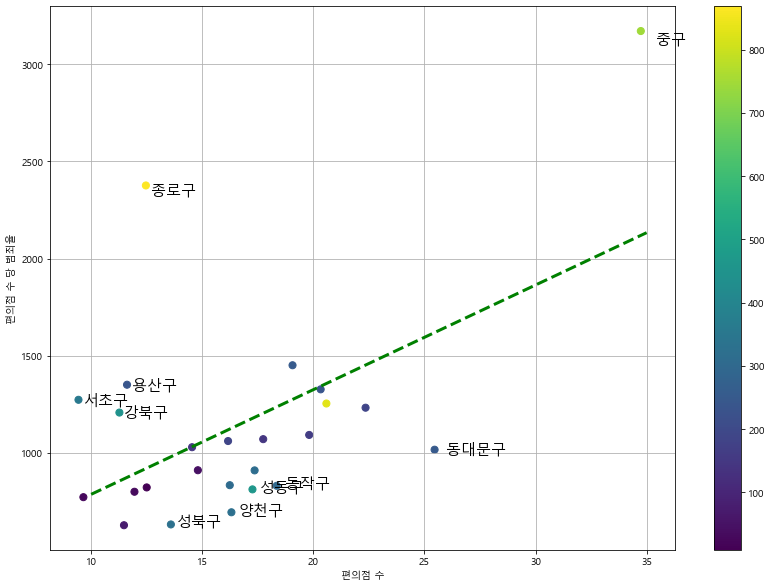

In [125]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['편의점 수'], crime_data['범죄율(10만명 당)'], c=crime_data['카페 오차'], s= 50)
plt.plot(fx4, f4(fx4), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['편의점 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('편의점 수')
plt.ylabel('편의점 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [127]:
fp5 = np.polyfit(crime_data['공원 수'], crime_data['범죄율(10만명 당)'], 1)

f5 = np.poly1d(fp5)
fx5 = np.linspace(3.5, 7.5, 10)

crime_data['공원 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f5(crime_data['공원 수']))

df_sort = crime_data.sort_values(by = '공원 오차', ascending=False)

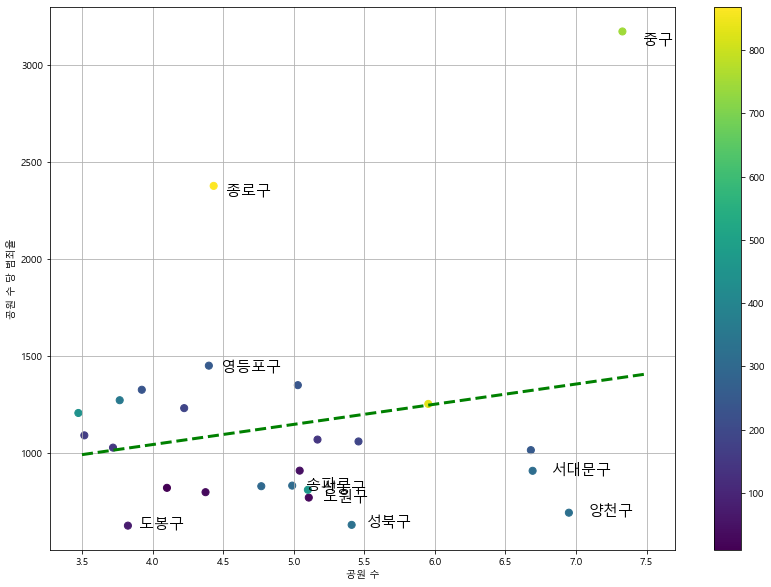

In [128]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['공원 수'], crime_data['범죄율(10만명 당)'], c=crime_data['카페 오차'], s= 50)
plt.plot(fx5, f5(fx5), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['공원 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('공원 수')
plt.ylabel('공원 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [130]:
f6 = np.poly1d(fp6)
fx6 = np.linspace(12, 28, 10)

crime_data['버스정류장 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f6(crime_data['버스정류장 수']))

df_sort = crime_data.sort_values(by = '버스정류장 오차', ascending=False)

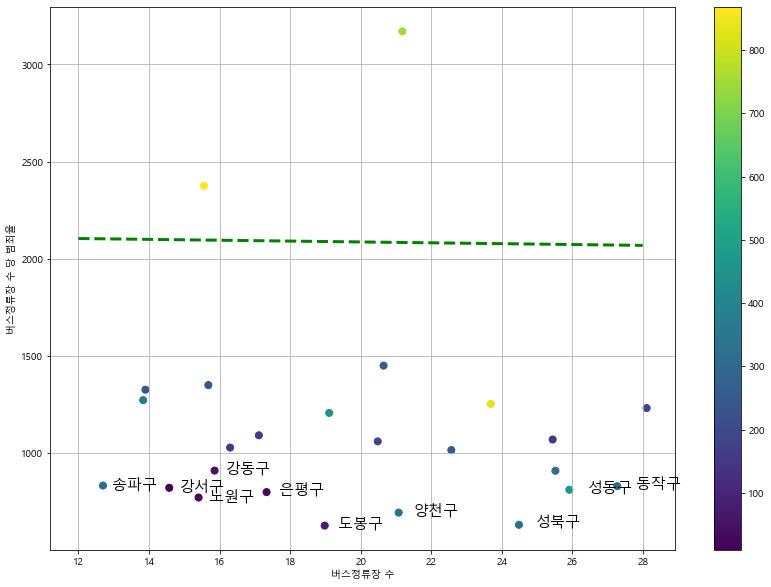

In [131]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['버스정류장 수'], crime_data['범죄율(10만명 당)'], c=crime_data['카페 오차'], s= 50)
plt.plot(fx6, f6(fx6), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['버스정류장 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('버스정류장 수')
plt.ylabel('버스정류장 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [135]:
f7 = np.poly1d(fp7)
fx7 = np.linspace(100, 900, 10)

crime_data['가로등 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f7(crime_data['가로등 수']))

df_sort = crime_data.sort_values(by = '가로등 오차', ascending=False)

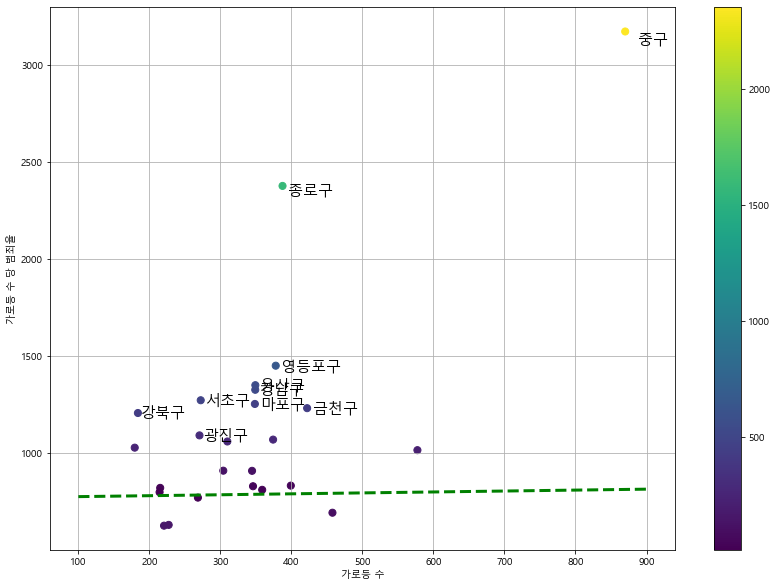

In [136]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['가로등 수'], crime_data['범죄율(10만명 당)'], c=crime_data['가로등 오차'], s= 50)
plt.plot(fx7, f7(fx7), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['가로등 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('가로등 수')
plt.ylabel('가로등 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [138]:
fp8 = np.polyfit(crime_data['ATM 수'], crime_data['범죄율(10만명 당)'], 1)

f8 = np.poly1d(fp8)
fx8 = np.linspace(10, 40, 10)

crime_data['ATM 오차'] = np.abs(crime_data['범죄율(10만명 당)'] - f8(crime_data['ATM 수']))

df_sort = crime_data.sort_values(by = 'ATM 오차', ascending=False)

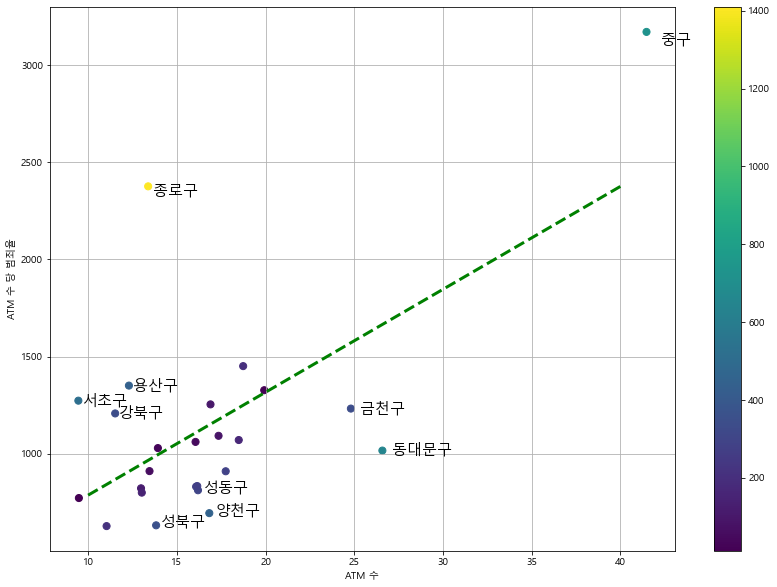

In [139]:
plt.figure(figsize = (14,10))
plt.scatter(crime_data['ATM 수'], crime_data['범죄율(10만명 당)'], c=crime_data['ATM 오차'], s= 50)
plt.plot(fx8, f8(fx8), ls = '--', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['ATM 수'][n]*1.02, df_sort['범죄율(10만명 당)'][n]*0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('ATM 수')
plt.ylabel('ATM 수 당 범죄율')

plt.colorbar()
plt.grid()
plt.show()

In [140]:
from scipy import stats

print(stats.pearsonr(crime_data['경찰관서 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['소방관서 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['카페 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['편의점 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['공원 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['버스정류장 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['가로등 수'], crime_data['범죄율(10만명 당)']))
print(stats.pearsonr(crime_data['ATM 수'], crime_data['범죄율(10만명 당)']))

(0.575151721269767, 0.0026319242453207753)
(0.6304473821029057, 0.0007296602172681198)
(0.7325167518788599, 3.1352692776149524e-05)
(0.5404390371233153, 0.005286467635095)
(0.20538696304972398, 0.32466706133360007)
(-0.08079308278540315, 0.7010432889133827)
(0.6753045571821226, 0.00021236640492085612)
(0.6300369494305523, 0.0007373004719424188)


In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

crime_data['intercept'] = 1

mlr = sm.OLS(crime_data['범죄율(10만명 당)'], crime_data[['intercept', '경찰관서 수', '소방관서 수', '카페 수', '편의점 수', '공원 수', '버스정류장 수', '가로등 수', 'ATM 수','반려동물 가구 비율(%, 인구 수)','행복지수 종합']])
results_mlr = mlr.fit()
results_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            범죄율(10만명 당)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1.849
Date:                Fri, 25 Feb 2022   Prob (F-statistic):              0.156
Time:                        15:02:58   Log-Likelihood:                -147.62
No. Observations:                  23   AIC:                             317.2
Df Residuals:                      12   BIC:                             329.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept            2029.5613   1560.093      1.301      0.218   -1369.589    5428.711
경찰관서 수               -109.0840    335.297     -0.325      0.751    -839.634     621.466
소방관서 수               1057.9554   1281.350      0.826      0.425   -1733.867    3849.778
카페 수                    9.6793      4.274      2.265      0.043       0.367      18.992
편의점 수                -111.9981     68.198     -1.642      0.126    -260.588      36.592
공원 수                 -166.6032     82.024     -2.031      0.065    -345.319      12.112
버스정류장 수                -2.7634     13.913     -0.199      0.846     -33.076      27.550
가로등 수                   0.0901      1.223      0.074      0.942      -2.575       2.756
ATM 수                 105.3037     61.523      1.712      0.113     -28.744     239.351
반려동물 가구 비율(%, 인구 수)    22.0286     27.792      0.793      0.443     -38.524      82.582
행복지수 종합              -172.8977    197.959     -0.873      0.400    -604.214     258.419
==============================================================================
Omnibus:                        2.210   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.195
Skew:                          -0.180   Prob(JB):                        0.550
Kurtosis:                       1.943   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""